In [271]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import pickle
import matplotlib.pyplot as plt
from pprint import pprint
from stocks import Stocks, Ticker

In [30]:
num_topics = 50 # make this consistent with LDA file

In [13]:
stocks = Stocks()

Retrieved current S&P500 tickers ['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX', 'WRB', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'CSGP', 'COST', 'CTRA

 50%|█████████████████████████████████████████████████▉                                                  | 251/503 [00:00<00:00, 2501.68it/s]

Setting up MMM
Setting up AOS
Setting up ABT
Setting up ABBV
Setting up ABMD
Setting up ACN
Setting up ATVI
Setting up ADM
Setting up ADBE
Setting up ADP
Setting up AAP
Setting up AES
Setting up AFL
Setting up A
Setting up APD
Setting up AKAM
Setting up ALK
Setting up ALB
Setting up ARE
Setting up ALGN
Setting up ALLE
Setting up LNT
Setting up ALL
Setting up GOOGL
Setting up GOOG
Setting up MO
Setting up AMZN
Setting up AMCR
Setting up AMD
Setting up AEE
Setting up AAL
Setting up AEP
Setting up AXP
Setting up AIG
Setting up AMT
Setting up AWK
Setting up AMP
Setting up ABC
Setting up AME
Setting up AMGN
Setting up APH
Setting up ADI
Setting up ANSS
Setting up AON
Setting up APA
Setting up AAPL
Setting up AMAT
Setting up APTV
Setting up ANET
Setting up AJG
Setting up AIZ
Setting up T
Setting up ATO
Setting up ADSK
Setting up AZO
Setting up AVB
Setting up AVY
Setting up BKR
Setting up BALL
Setting up BAC
Setting up BBWI
Setting up BAX
Setting up BDX
Setting up WRB
Setting up BRK.B
Setting

100%|███████████████████████████████████████████████████████████████████████████████████████████████████▊| 502/503 [00:00<00:00, 2499.19it/s]

Setting up ZBH
Setting up ZION


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 503/503 [00:00<00:00, 2485.75it/s]

Setting up ZTS


In [22]:
with open('tickers_and_topics.pkl', 'rb') as f:
    tickers_and_topics = pickle.load(f)
tickers_and_topics

{'CAH': [(3, 0.34416974),
  (30, 0.14602631),
  (47, 0.07745895),
  (17, 0.054704323),
  (28, 0.044807393),
  (49, 0.042931426),
  (1, 0.038357873),
  (9, 0.027757958),
  (35, 0.025157342),
  (32, 0.019986283),
  (18, 0.014496694),
  (27, 0.013228824),
  (5, 0.01294736),
  (46, 0.012692575),
  (43, 0.012449613),
  (25, 0.011493122),
  (34, 0.011277592)],
 'FLS': [(34, 0.15019295),
  (32, 0.095036276),
  (24, 0.0907074),
  (27, 0.08565929),
  (5, 0.082257345),
  (35, 0.04416172),
  (33, 0.037090052),
  (45, 0.036286242),
  (19, 0.029874165),
  (9, 0.02925373),
  (18, 0.027611796),
  (38, 0.026788602),
  (39, 0.023970364),
  (46, 0.021338165),
  (3, 0.019180253),
  (13, 0.016899727),
  (43, 0.014506145),
  (42, 0.013067774),
  (44, 0.011940041),
  (8, 0.010493707),
  (6, 0.010343652),
  (49, 0.010243269)],
 'HBAN': [(21, 0.8796873), (16, 0.1189329)],
 'TSLA': [(35, 0.38598737),
  (44, 0.24209556),
  (13, 0.13674687),
  (19, 0.03620344),
  (11, 0.03221067),
  (24, 0.021206455),
  (14, 0.0

In [286]:
usable_tickers = []
for ticker in tickers_and_topics.keys():
    if ticker in stocks.tickers and stocks.tickers[ticker].has_expected_trading_days():
        usable_tickers.append(ticker)
print(usable_tickers, len(usable_tickers))

def intersect_tickers_and_topics_with_usable_tickers():
    tickers_and_topics_tickers = list(tickers_and_topics.keys())
    for ticker in tickers_and_topics_tickers:
        if ticker not in usable_tickers:
            del tickers_and_topics[ticker]
intersect_tickers_and_topics_with_usable_tickers()
len(tickers_and_topics)

['CAH', 'HBAN', 'EMN', 'ETN', 'VRSK', 'AWK', 'ROP', 'JNPR', 'CSX', 'LUV', 'WBA', 'JCI', 'TTWO', 'PSA', 'CMA', 'AAP', 'STZ', 'STX', 'ADP', 'PG', 'AMD', 'NEE', 'TGT', 'LDOS', 'UNH', 'MCO', 'VTRS', 'BK', 'MAA', 'TSCO', 'PFG', 'CVX', 'LUMN', 'RJF', 'LNT', 'EXR', 'DE', 'CF', 'MAS', 'LOW', 'GPC', 'ITW', 'MCK', 'EBAY', 'AON', 'BKR', 'TXT', 'BDX', 'T', 'TDY', 'JBHT', 'PPG', 'AMGN', 'SWK', 'J', 'CPB', 'MA', 'LRCX', 'DGX', 'PWR', 'SYY', 'HSIC', 'HON', 'NKE', 'AMZN', 'V', 'NTRS', 'CCI', 'CE', 'FDX', 'USB', 'XOM', 'MSFT', 'WMB', 'DPZ', 'FMC', 'BEN', 'TYL', 'UHS', 'CAT', 'KO', 'FAST', 'DXCM', 'AIZ', 'WM', 'LIN', 'HIG', 'MNST', 'A', 'SNPS', 'AMP', 'WDC', 'EQIX', 'SRE', 'INTU', 'XEL', 'SBUX', 'EMR', 'GL', 'REGN', 'VNO', 'L', 'GOOGL', 'CRL', 'RL', 'ADSK', 'ADM', 'ALB', 'MHK', 'CHRW', 'ALL', 'ESS', 'F', 'HST', 'CVS', 'PEP', 'CB', 'IT', 'SJM', 'WEC', 'PPL', 'EA', 'BMY', 'INCY', 'CINF', 'CL', 'NVDA', 'OKE', 'PKG', 'ORCL', 'MPWR', 'PNR', 'DVA', 'ANSS', 'TMO', 'PM', 'FRT', 'RF', 'AVY', 'ZION', 'HUM', 'COST

341

In [297]:
# Naive baseline code: assume num_topics affects all

this_ticker = "GOOG"
num_top_topics = 2

# Size of dataset
num_tickers = 50 # len(usable_tickers)
price_len = len(stocks.tickers["GOOG"].hist)

print("Size", size)
print("num_tickers", num_tickers)

# Predictor variable
price = stocks.tickers["GOOG"].hist["Close"]

Size 3021
num_tickers 50


In [289]:
# Find all tickers that share top 5 topics in common

def find_tickers_with_common_topics(ticker):
    topics = tickers_and_topics[ticker]
    print(topics)
    top_topics = [topic_id for topic_id, _ in topics[:num_top_topics]]
    print(top_topics)
    neighbor_tickers = []
    for other_ticker, topics in tickers_and_topics.items():
        if other_ticker == ticker or other_ticker == "GOOGL":
            continue
        other_top_topics = [topic_id for topic_id, _ in topics[:num_top_topics]]
        for i in range(num_top_topics):
            if top_topics[i] in other_top_topics:
                neighbor_tickers.append(other_ticker)
                break
            
    return neighbor_tickers
    

neighbor_tickers = find_tickers_with_common_topics(this_ticker)
num_neighbors = len(neighbor_tickers)
print(num_neighbors)
neighbor_tickers

In [298]:
baseline_model = pm.Model()
model = pm.Model()

with baseline_model:
    # Priors for unknown model parameters
    alpha = pm.Normal("alpha", mu=0, sigma=30)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=num_tickers)
    sigma = pm.HalfNormal("sigma", sigma=1)


    # Expected value of outcome
    mu = alpha
    for idx, ticker in enumerate(usable_tickers[:num_tickers]):
        if ticker == this_ticker:
            continue
        mu += beta[idx] * stocks.tickers[ticker].hist["Close"]
    
    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=price)

with model:
    # Priors for unknown model parameters
    alpha = pm.Normal("alpha", mu=0, sigma=30)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=len(neighbor_tickers))
    sigma = pm.HalfNormal("sigma", sigma=1)
    
    # Expected value of outcome
    mu = alpha

    for idx, ticker in enumerate(neighbor_tickers):
        mu += beta[idx] * stocks.tickers[ticker].hist["Close"]
        
    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=stocks.tickers[this_ticker].hist["Close"])

In [253]:
%%time
with model:
    # draw 1000 posterior samples
    idata = pm.sample(10000, chains=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [alpha, beta, sigma]


Sampling 1 chain for 1_000 tune and 10_000 draw iterations (1_000 + 10_000 draws total) took 1356 seconds.


CPU times: user 22min 39s, sys: 6.04 s, total: 22min 45s
Wall time: 22min 42s


In [ ]:
%%time
with baseline_model:
    # draw 1000 posterior samples
    idata_baseline = pm.sample(100, chains=1)


Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [alpha, beta, sigma]


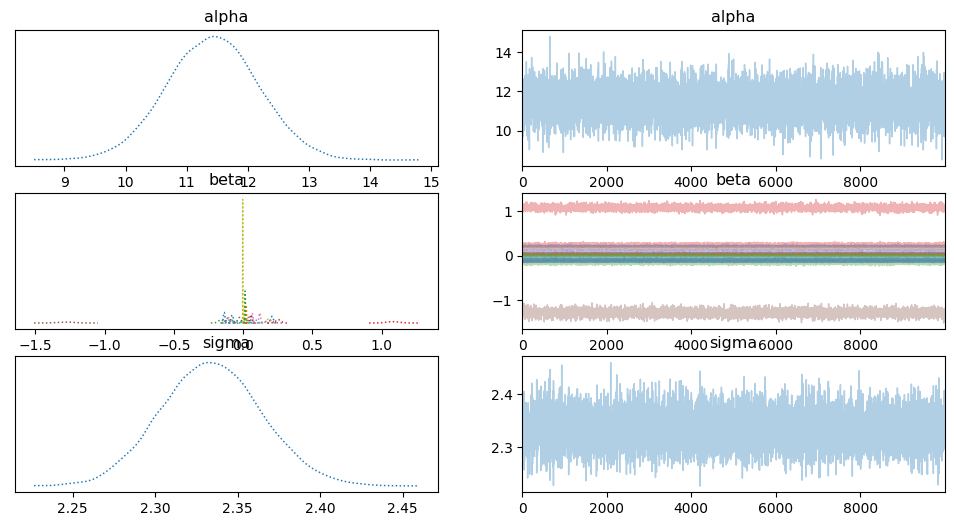

In [256]:
az.plot_trace(idata, combined=True);


In [257]:
az.summary(idata, round_to=2)


arviz - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,11.42,0.75,10.06,12.86,0.01,0.01,8789.97,7326.57,NaN
beta[0],0.21,0.01,0.19,0.23,0.00,0.00,7523.82,6702.21,NaN
beta[1],-0.11,0.01,-0.13,-0.08,0.00,0.00,7286.11,7744.73,NaN
beta[2],-0.16,0.02,-0.20,-0.12,0.00,0.00,8506.10,7678.59,NaN
beta[3],0.25,0.02,0.22,0.29,0.00,0.00,8020.27,6742.93,NaN
beta[4],-0.11,0.01,-0.14,-0.09,0.00,0.00,10217.56,8207.65,NaN
beta[5],-1.28,0.06,-1.40,-1.16,0.00,0.00,5628.98,6333.67,NaN
beta[6],0.07,0.01,0.05,0.08,0.00,0.00,5672.35,6493.98,NaN
beta[7],0.04,0.01,0.02,0.06,0.00,0.00,6732.51,7407.23,NaN
beta[8],0.18,0.02,0.16,0.21,0.00,0.00,8997.00,7552.20,NaN


In [258]:
idata


Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [259]:
sampled_alpha = idata.posterior["alpha"][0][-1].to_numpy()
sampled_betas = idata.posterior["beta"][0][-1].to_numpy()

In [292]:
plt.bar(sampled_betas)
print(sampled_alpha)

TypeError: bar() missing 1 required positional argument: 'height'

In [261]:
neighbor_tickers

['ETN',
 'LDOS',
 'LUMN',
 'EBAY',
 'BKR',
 'T',
 'TDY',
 'CCI',
 'EMR',
 'INTC',
 'AKAM',
 'GE',
 'TEL',
 'ATVI',
 'APH',
 'ROST',
 'EFX',
 'AME',
 'BKNG',
 'CMCSA',
 'KMX',
 'NOC',
 'NFLX',
 'IPG']

In [274]:
def predict_baseline():
    predicted_price = np.ones(price_len) * sampled_alpha

    for idx, ticker in enumerate(usable_tickers[:num_tickers]):
        if ticker == this_ticker:
            continue
        predicted_price += sampled_betas[idx] * stocks.tickers[ticker].hist["Close"]


def predict():
    predicted_price = np.ones(price_len) * sampled_alpha

    for idx, ticker in enumerate(neighbor_tickers):
        predicted_price += sampled_betas[idx] * stocks.tickers[ticker].hist["Close"]

    return predicted_price

In [275]:
predicted_price = predict()
pprint(predicted_price)

Date
2010-01-04 00:00:00-05:00     12.211040
2010-01-05 00:00:00-05:00     11.834691
2010-01-06 00:00:00-05:00     12.067003
2010-01-07 00:00:00-05:00     12.122756
2010-01-08 00:00:00-05:00     12.336782
                                ...    
2021-12-27 00:00:00-05:00    147.458651
2021-12-28 00:00:00-05:00    148.073746
2021-12-29 00:00:00-05:00    148.692955
2021-12-30 00:00:00-05:00    148.047326
2021-12-31 00:00:00-05:00    148.116281
Name: Close, Length: 3021, dtype: float64


In [276]:
price

Date
2010-01-04 00:00:00-05:00     15.610239
2010-01-05 00:00:00-05:00     15.541497
2010-01-06 00:00:00-05:00     15.149715
2010-01-07 00:00:00-05:00     14.797037
2010-01-08 00:00:00-05:00     14.994298
                                ...    
2021-12-27 00:00:00-05:00    148.063995
2021-12-28 00:00:00-05:00    146.447998
2021-12-29 00:00:00-05:00    146.504501
2021-12-30 00:00:00-05:00    146.002502
2021-12-31 00:00:00-05:00    144.679504
Name: Close, Length: 3021, dtype: float64

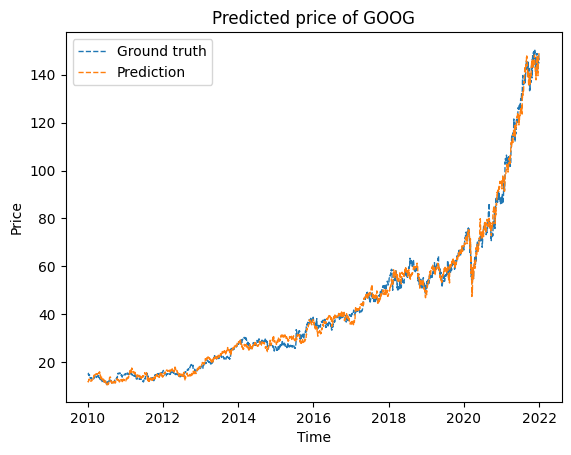

In [279]:
plt.plot(price, '--', label="Ground truth", markersize=0.1, linewidth=1)
plt.plot(predicted_price, '--', label="Prediction", markersize=0.1, linewidth=1)
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Predicted price of GOOG")
plt.legend()
plt.savefig("figs/goog-mcmc.png")

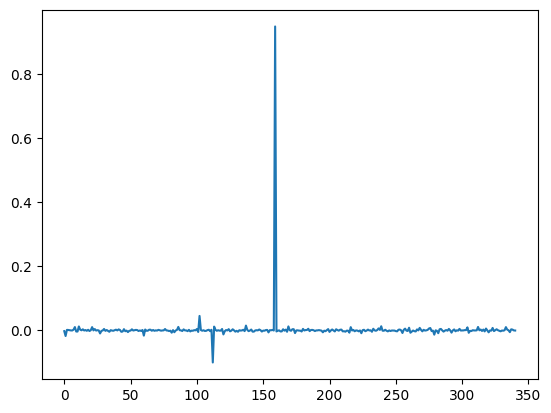

In [217]:
plt.plot(sampled_betas)

In [280]:
mse = ((predicted_price - price)**2).mean(axis=0)
mse

5.4291825089507135

0.001151576103731449